# SVR

## Cómo importar las librerías


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importar el data set


In [11]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values


## Escalado de variables

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

## Ajustar la regresión con el dataset

In [16]:
from sklearn.svm import SVR
regression = SVR(kernel = "rbf")
regression.fit(X, y)

/home/flavio/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicción de nuestros modelos con SVR


In [24]:
y_pred  = regression.predict([[6.5]])
print(y_pred)

value_scaled = sc_X.transform(np.array([[6.5]]))
print(value_scaled)

y_pred_scaled = regression.predict(value_scaled)
print(y_pred_scaled)

y_pred_2 = sc_y.inverse_transform([y_pred_scaled])
print(y_pred_2)

[0.01158103]
[[0.34815531]]
[-0.27861589]
[[170370.0204065]]


## Visualización de los resultados del SVR

/tmp/ipykernel_64382/1905002696.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


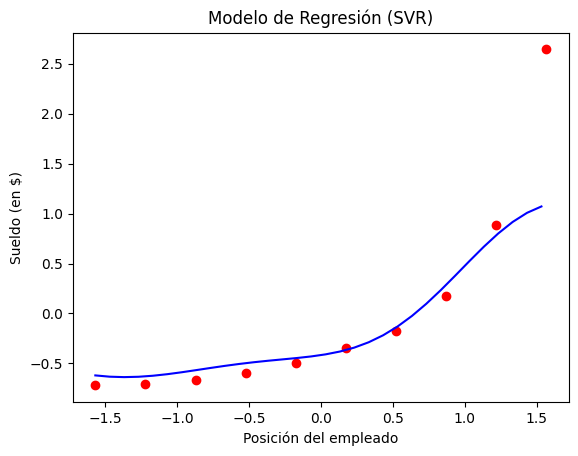

In [31]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X_grid, regression.predict(X_grid), color = "blue")
plt.title("Modelo de Regresión (SVR)")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

## Desescalado de variables

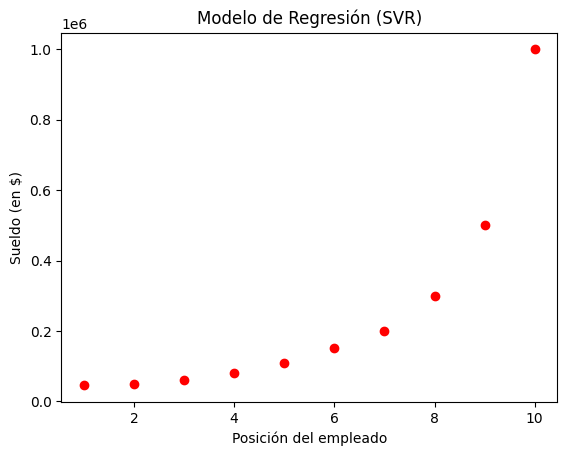

In [70]:
x_desescalado = sc_X.inverse_transform(X)
y_desescalado = sc_y.inverse_transform(y)
# print(x_desescalado)
# print(y_desescalado)
plt.scatter(x_desescalado, y_desescalado, color = "red")
# plt.plot(X_grid_desescalado, prediction, color = "blue")
plt.title("Modelo de Regresión (SVR)")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()